## Real Estate - price predictor

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
house=pd.read_csv("housing.csv")

In [3]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [10]:
house['CHAS'].value_counts()

0    476
1     35
Name: CHAS, dtype: int64

In [7]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,502.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.289721,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.704758,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.887250,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.210000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


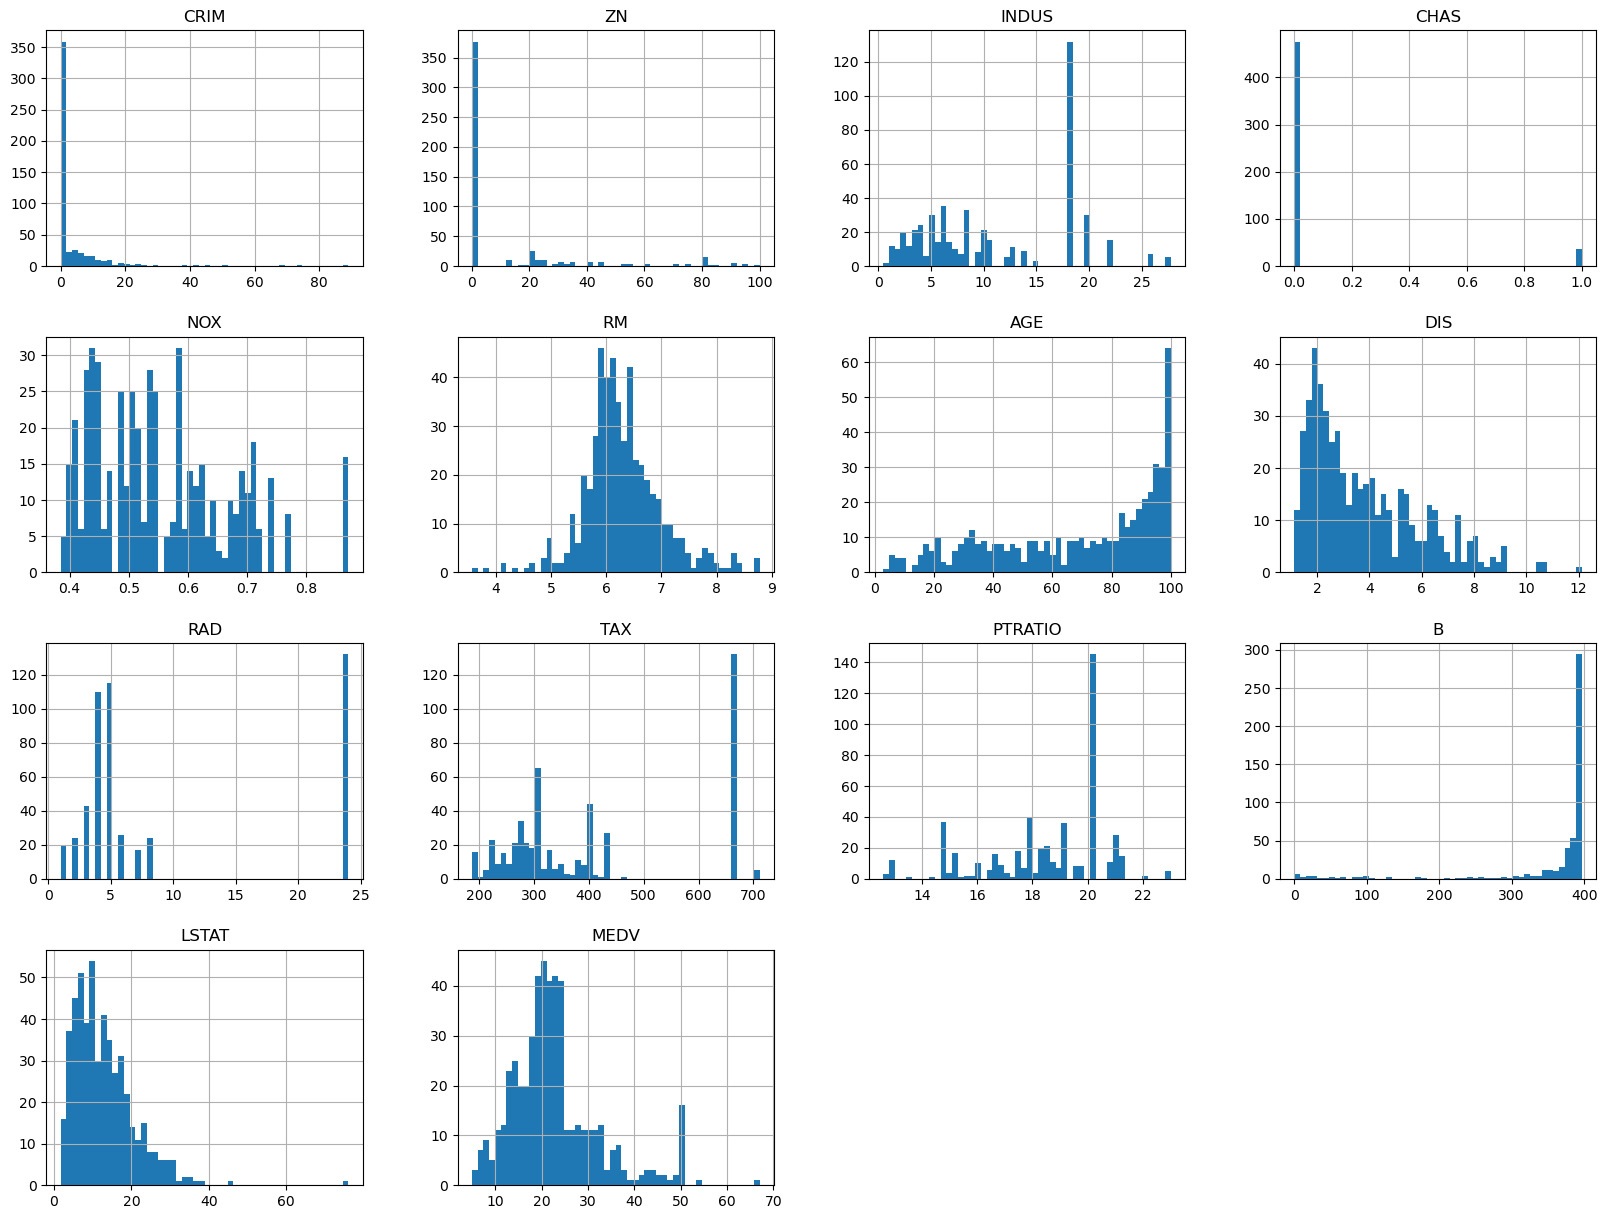

In [8]:
house.hist(bins=50, figsize=(20,15))
plt.show()

# Train and Test Splitting

In [9]:
x=house.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]

In [10]:
x.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
y=house.iloc[:,[-1]]

In [12]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
506,12.0
507,32.0
508,54.0
509,67.0


In [13]:
from sklearn .model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(house[['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
                                    'TAX','PTRATIO','B','LSTAT']],house['MEDV'],test_size=0.2)

In [14]:
len(x_train)

408

In [15]:
len(x_test)

103

In [16]:
len(y_train)

408

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house, house['CHAS']):
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]

In [18]:
strat_test_set['CHAS'].value_counts()

0    96
1     7
Name: CHAS, dtype: int64

In [19]:
strat_train_set['CHAS'].value_counts()

0    380
1     28
Name: CHAS, dtype: int64

# Looking For Correlation

In [20]:
corr_matrix = house.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.668193
ZN         0.339767
B          0.317941
DIS        0.233469
CHAS       0.164782
AGE       -0.368203
RAD       -0.379016
CRIM      -0.380072
NOX       -0.411486
PTRATIO   -0.447464
TAX       -0.459274
INDUS     -0.463269
LSTAT     -0.562960
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='DIS', ylabel='MEDV'>,
        <Axes: xlabel='INDUS', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='DIS', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='DIS'>,
        <Axes: xlabel='ZN', ylabel='DIS'>,
        <Axes: xlabel='DIS', ylabel='DIS'>,
        <Axes: xlabel='INDUS', ylabel='DIS'>],
       [<Axes: xlabel='MEDV', ylabel='INDUS'>,
        <Axes: xlabel='ZN', ylabel='INDUS'>,
        <Axes: xlabel='DIS', ylabel='INDUS'>,
        <Axes: xlabel='INDUS', ylabel='INDUS'>]], dtype=object)

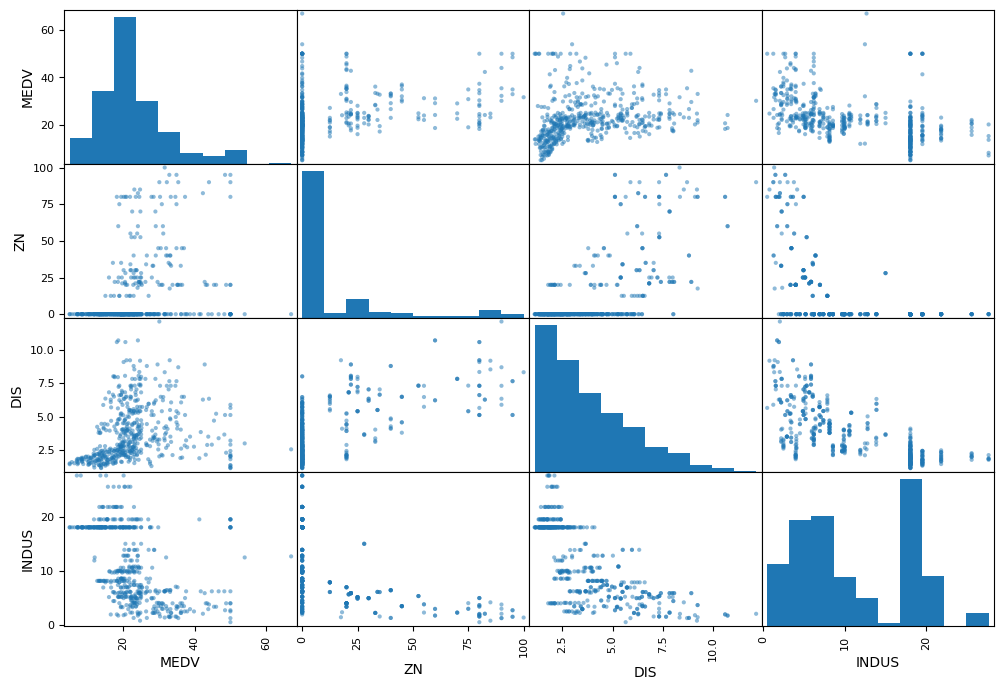

In [22]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','ZN','DIS','INDUS']
scatter_matrix(house[attributes],figsize = (12,8))

# Trying out attribute combination 

In [23]:
house['TAXIND'] = house['TAX']/house['INDUS']

In [24]:
house['TAXIND']

0      128.138528
1       34.229137
2       34.229137
3      101.834862
4      101.834862
          ...    
506     25.600000
507     25.600000
508     25.600000
509     25.905512
510     26.953125
Name: TAXIND, Length: 511, dtype: float64

In [25]:
corr_matrix = house.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.668193
ZN         0.339767
B          0.317941
TAXIND     0.301438
DIS        0.233469
CHAS       0.164782
AGE       -0.368203
RAD       -0.379016
CRIM      -0.380072
NOX       -0.411486
PTRATIO   -0.447464
TAX       -0.459274
INDUS     -0.463269
LSTAT     -0.562960
Name: MEDV, dtype: float64

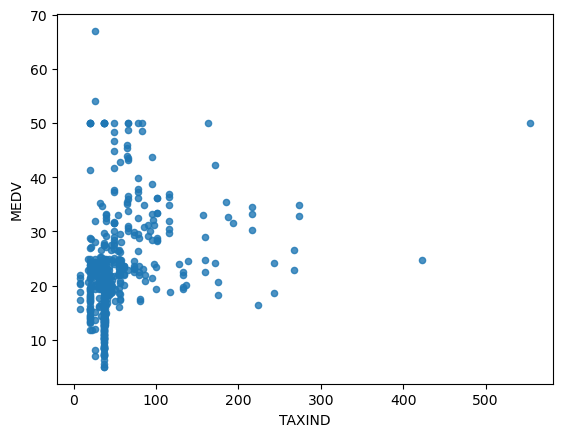

In [26]:
house.plot(kind="scatter" , x="TAXIND" , y="MEDV" , alpha=0.8)
plt.show()

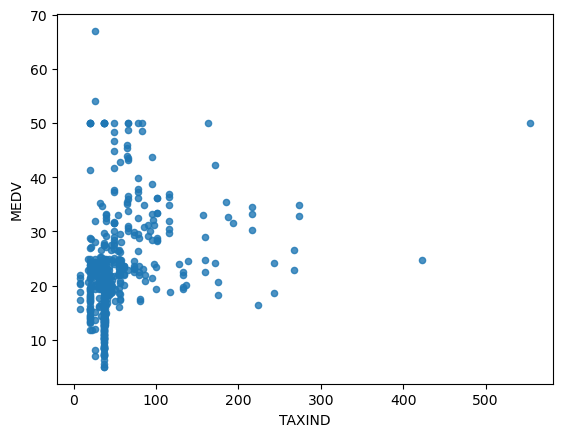

In [27]:
house.plot(kind="scatter" , x="TAXIND" , y="MEDV" , alpha=0.8)
plt.show()

In [28]:
house = strat_train_set.drop("MEDV", axis=1)
house_labels = strat_train_set["MEDV"].copy()

# Missing Attributes

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(house)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.79500e+01, 3.10730e+00, 5.00000e+00, 3.35000e+02,
       1.90500e+01, 3.90980e+02, 1.17050e+01])

In [31]:
X = imputer.transform(house)

In [32]:
house_tr = pd.DataFrame(X, columns=house.columns)

In [33]:
house_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,408.000000,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.270125,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.697301,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.883000,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.209000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000
75%,3.716458,12.500000,18.10000,0.000000,0.625750,6.620500,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000


# Creating a pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [35]:
house_num_tr = my_pipeline.fit_transform(house)

In [36]:
house_num_tr.shape

(408, 13)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(house_num_tr, house_labels)

RandomForestRegressor()

In [38]:
some_data = house.iloc[:5]

In [39]:
some_labels = house_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([21.332, 22.442, 26.221, 31.071, 20.437])

In [46]:
list(some_labels)

[23.1, 21.9, 27.5, 31.1, 18.9]

# Evaluating the model

In [48]:
from sklearn.metrics import mean_squared_error
house_predictions = model.predict(house_num_tr)
mse = mean_squared_error(house_labels, house_predictions)
rmse = np.sqrt(mse)

In [49]:
rmse

1.4684626640089389

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, house_num_tr, house_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

# Saving the model

In [ ]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

# Testing the model

In [50]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [51]:
final_rmse

4.865822101983932

In [52]:
prepared_data

array([[-0.42152521, -0.48685178, -0.24673925, -0.27144836,  0.2311586 ,
        -0.86169665, -1.42946756, -0.4510327 , -0.42117544, -0.12039257,
         0.3268577 ,  0.41580739,  0.64788652],
       [-0.43776099,  3.14285176, -1.1325159 , -0.27144836, -1.43355877,
        -0.23278912, -1.31615648,  2.63129804, -0.9955056 , -0.57272902,
        -0.98103103,  0.41161669, -0.87937274],
       [ 0.12176277, -0.48685178,  0.9845635 , -0.27144836,  1.37834725,
        -3.88992949,  0.66324649, -1.02000896,  1.6464131 ,  1.51635118,
         0.79396081,  0.01150978, -0.80321747],
       [-0.441028  ,  2.23542587, -1.23646655, -0.27144836, -1.35592946,
         0.76082735, -2.09871114,  1.19100188, -0.9955056 , -0.87031879,
        -1.35471352,  0.41664553, -1.09260748],
       [-0.43577744, -0.48685178, -0.79284618, -0.27144836, -0.51063256,
        -0.08776706, -0.03432486, -0.18142416, -0.53604147, -0.78699366,
         0.3268577 ,  0.45362844, -0.44874932]])

# Using the model

In [53]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([25.243])